# Signal Generation

## Theoretical Approach
The primary objective of this notebook is to generate a synthetic time-domain signal to serve as a controlled input dataset for the Discrete Fourier Analysis pipeline. By constructing a signal from known mathematical components, specifically, a superposition of sinusoidal waves with distinct frequencies and amplitudes, we establish a ground truth. This allows for rigorous verification of the DFT implementation in subsequent stages; we can compare the analyzed frequency spectrum against the known generation parameters to ensure accuracy.

To better approximate real-world data acquisition scenarios, stochastic noise is injected into the deterministic signal. This addition of random variation ensures that the downstream analysis algorithms are robust against imperfections inherent in physical sensors, thermal fluctuations, and transmission channels. This step is crucial for testing the effectiveness of the filtering techniques implemented later in the pipeline.

## Mathematical Formulation
We model the continuous-time signal $x(t)$ as the sum of a deterministic component $s(t)$ and a stochastic noise component $\eta(t)$:

$$
x(t) = s(t) + \eta(t)
$$

### The Deterministic Component
The clean signal $s(t)$ is constructed as a linear combination of sinusoidal waves. For this implementation, we combine two sine waves:

$$
s(t) = A_1 \sin(2\pi f_1 t) + A_2 \sin(2\pi f_2 t)
$$

Where:
* $A_1, A_2$ represent the peak amplitudes of the respective components.
* $f_1, f_2$ represent the oscillation frequencies in Hertz (Hz).
* $t$ represents continuous time in seconds.

### The Stochastic Component
The noise term $\eta(t)$ simulates background interference using Additive White Gaussian Noise. Each noise sample is treated as a random variable drawn from a Normal distribution:

$$
\eta(t) \sim \mathcal{N}(\mu, \sigma^2)
$$

In this simulation, we define the noise to be zero-mean ($\mu=0$) with a specified standard deviation $\sigma$. A higher $\sigma$ value results in a noisier signal with greater deviation from the deterministic curve, while a lower $\sigma$ represents a cleaner signal.

### Discretization
Since digital systems process discrete data rather than continuous functions, $x(t)$ must be sampled at fixed time intervals. The sampling operation is governed by the sampling rate $f_s$ and the total number of samples $N$.

The sampling interval $T_s$ is the inverse of the sampling rate:
$$
T_s = \frac{1}{f_s}
$$

The discrete time instances $t_n$ correspond to integer multiples of the sampling interval:
$$
t_n = n \cdot T_s, \quad \text{for } n = 0, 1, \dots, N-1
$$

Substituting these discrete time steps into our continuous model yields the final discrete sequence $x[n]$:

$$
x[n] = \underbrace{A_1 \sin(2\pi f_1 n T_s) + A_2 \sin(2\pi f_2 n T_s)}_{\text{Signal}} + \underbrace{\eta[n]}_{\text{Noise}}
$$

### Libraries Import

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Signal Configuration

In [22]:
# Signal properties
N = 256
fs = 1000
T_s = 1.0 / fs

# Component 1
f1 = 50.0
A1 = 1.0

# Component 2
f2 = 120.0
A2 = 0.5

# Noise standard deviation
noise_std = 0.4

### Signal generation

In [23]:
# Generating the time vector
t = np.arange(N) * T_s

# Generating the deterministic signal
signal_clean = A1 * np.sin(2.0 * np.pi * f1 * t) + A2 * np.sin(2.0 * np.pi * f2 * t)

# Generating Gaussian noise
noise = np.random.normal(loc=0.0, scale=noise_std, size=N)

# Final signal
signal_noisy = signal_clean + noise

print(f"Generated signal with {N} samples over {t[-1]:.3f} seconds.")

Generated signal with 256 samples over 0.255 seconds.


### Signal Visualization

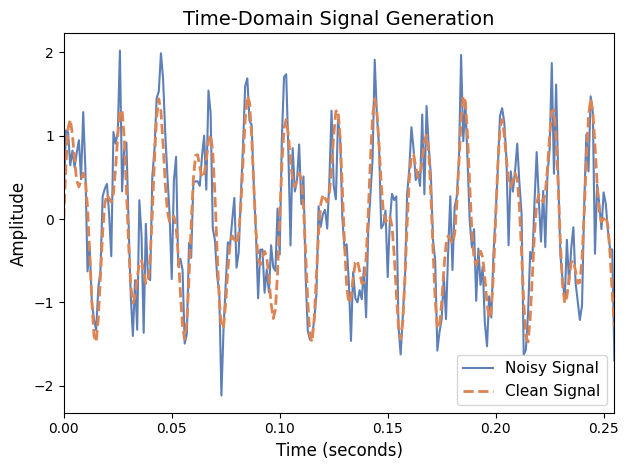

In [24]:
plt.figure()

# Plotting the noisy signal
plt.plot(t, signal_noisy, label="Noisy Signal", 
         color="#4c72b0", linewidth=1.5, alpha=0.9)

# Plotting the clean signal
plt.plot(t, signal_clean, label="Clean Signal", 
         color="#dd8452", linestyle="--", linewidth=2)

plt.title("Time-Domain Signal Generation", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend(frameon=True, fontsize=11)
plt.xlim(0, t[-1])
plt.tight_layout()
plt.show()

### Data Export

In [25]:
# Creating a dataframe
df_output = pd.DataFrame({
    'time_s': t,
    'signal_amplitude': signal_noisy
})

output_filename = 'signal_data.csv'

df_output.to_csv(output_filename, index=False)

print(f"Dataset saved to '{output_filename}'")
print("- Rows:", len(df_output))
print("- Columns:", len(df_output.columns))

Dataset saved to 'signal_data.csv'
- Rows: 256
- Columns: 2
